# Importing Required Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder # for encoding of dataset into numbers
from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import train_test_split # splitting of dataset
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.cross_validation import cross_val_score # cross-validation
from sklearn.metrics import accuracy_score
import seaborn as sns # plotting library
import datetime

/Users/yogeshkohli/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yogeshkohli/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#  Reading the CSV File 

###  Splitting data into 70:30 ratio  ;  Checking for any null values ;   Encoding data into numbers 
  

In [2]:
#Loading data from CSV
df = pd.read_csv('mushrooms.csv')
total_size=len(df)
print('TOTAL SIZE OF DATASET : ')
print(total_size)
print('\n')

print('DATASET DESCRIPTION IS  : ')
dataDesc = df.describe()
print(dataDesc)
print('\n')

#Encoding data into numbers
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

feature_columns = df.columns[1:]
for i, f in zip(np.arange(1, len(feature_columns) + 1), feature_columns):
    print('feature {:d}:\t{}'.format(i, f))

print('\n')

X = df.iloc[:,1:23]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only
X.head()
y.head()

#Spliting training testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=0)

print('CHECKING FOR NULL VALUES :')
print(df.loc[:,df.isnull().sum()>0].columns) #Checking for a NaN/null value
print('\n')

# Setting some plotting parameters
sns.set_context('paper')
sns.set(style='whitegrid', rc={'grid.linestyle':':', 'axes.titlesize':16, 'axes.labelsize':16, 'xtick.labelsize':16,
                              'ytick.labelsize':14, 'figure.figsize':(8,6), 'legend.fontsize':12})
    

TOTAL SIZE OF DATASET : 
8124


DATASET DESCRIPTION IS  : 
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
count          8124      8124       8124   ...                       8124   
unique            2         2         12   ...                          4   
top               c         b          b   ...                          s   
freq           6812      5612       1728   ...                       4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique    

###  Finding Important Features

Feature Ranking:
1. Feature 7 (0.136236)
2. Feature 4 (0.124041)
3. Feature 3 (0.106231)
4. Feature 18 (0.077880)
5. Feature 6 (0.065040)
6. Feature 10 (0.064705)
7. Feature 19 (0.057232)
8. Feature 11 (0.057108)
9. Feature 8 (0.051125)
10. Feature 9 (0.047855)
11. Feature 20 (0.043743)
12. Feature 12 (0.043577)
13. Feature 21 (0.031581)
14. Feature 17 (0.019222)
15. Feature 1 (0.017348)
16. Feature 13 (0.016706)
17. Feature 14 (0.015284)
18. Feature 2 (0.010675)
19. Feature 5 (0.006217)
20. Feature 16 (0.004353)
21. Feature 0 (0.003842)
22. Feature 15 (0.000000)


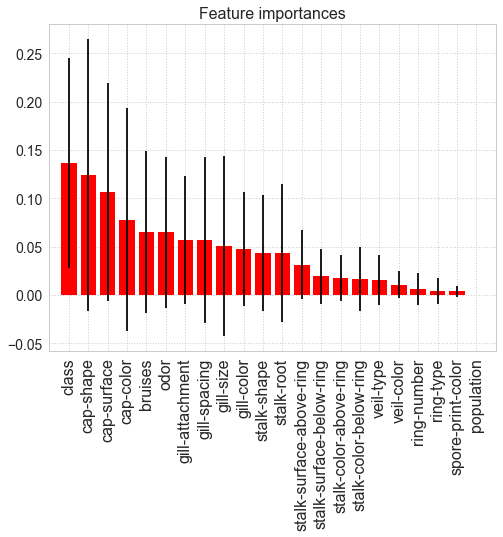

In [3]:
# For feature importance 
forest = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
forest.fit(X, y)

# Find feature importance 
feat_importance = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(feat_importance)[::-1]

# Feature ranking 
print("Feature Ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], feat_importance[indices[f]]))
#Plotting Feature Importance
importances = forest.feature_importances_
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), df.columns)
plt.xlim([-1, X.shape[1]])
plt.xticks(rotation=90)
plt.show() 

# Build a Random Forest 
#### Calculating Confusion Matrix and all the other fields

/Users/yogeshkohli/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in RandomizedSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


AUC_ROC IS : 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2968
          1       1.00      1.00      1.00      2719

avg / total       1.00      1.00      1.00      5687



ROC_AUC IS : 
0.999995910777


ACCURACY IS : 
0.998065764023


BEST SCORE IS : 
0.9958965941731637


BEST HYPERPARAMETERS ARE : 
{'n_estimators': 210, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


CONFUSION MATRIX IS : 
[[2968    0]
 [  11 2708]]




F1 = 2 * (precision * recall) / (precision + recall)
F1 SCORE OF TEST AND PREDICTION : 
[ 0.99815033  0.9979731 ]


Performing Cross Validation now...




/Users/yogeshkohli/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1023: UserWarning: Note that pos_label (set to [0, 1]) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Train score: 
 [ 1.          0.96551724  1.          1.          1.          1.          1.
  0.94642857  0.96428571  1.        ] 

Training Accuracy: 0.99 (+/- 0.04)


Test score: 
 [ 1.          0.98412698  1.          1.          0.96875     1.          1.
  1.          1.          1.        ] 

Test Accuracy: 1.00 (+/- 0.02)


time taken by date time method is 04m:44s


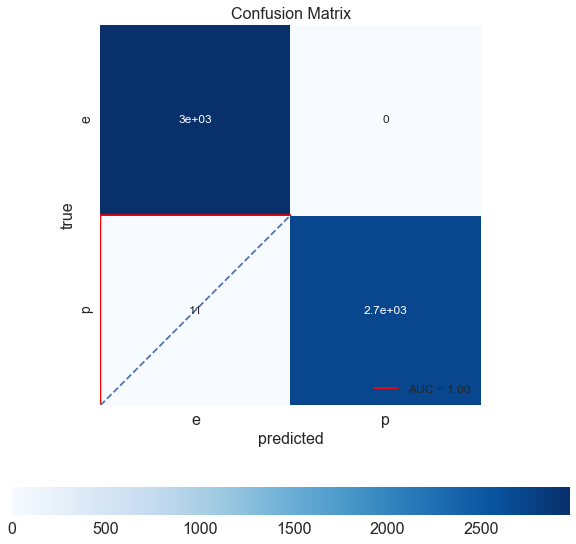

In [4]:
#Applying RandomForest ALGORITHM
# Set the start point.
startTime = datetime.datetime.now()
model_RR=RandomForestClassifier()
tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,250,10),
                    'max_features':['auto','sqrt','log2']
                    }
RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)
RR_model.fit(X_train,y_train)
y_prob = RR_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)

#Calculating AUC_ROC
auc_roc=metrics.classification_report(y_test,y_pred)
print('AUC_ROC IS : ')
print(auc_roc)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
#AREA UNDER CURVE
roc_auc = auc(false_positive_rate, true_positive_rate)
print('ROC_AUC IS : ')
print(roc_auc)
print('\n')

#ACCURACY
accuracy = metrics.accuracy_score(y_test, y_pred)
print('ACCURACY IS : ')
print(accuracy)
print('\n')

print('BEST SCORE IS : ')
print(RR_model.best_score_)
print('\n')

print('BEST HYPERPARAMETERS ARE : ')
print(RR_model.best_params_)
print('\n')

#Calculating Confusion Matrix
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print('CONFUSION MATRIX IS : ')
print(confusion_matrix)
print('\n')

#Plotting CONFUSION MATRIX
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('\n')

# print('\nConfusion Matrix:')
_ = sns.heatmap(confusion_matrix, square = True, xticklabels = ['e', 'p'], annot = True, annot_kws = {'fontsize': 12}, yticklabels = ['e', 'p'], cbar = True, cbar_kws = {"orientation": "horizontal"}, cmap = "Blues").set(xlabel = "predicted", ylabel = "true", title = 'Confusion Matrix')

print('F1 = 2 * (precision * recall) / (precision + recall)')
score_test = metrics.f1_score(y_test, y_pred, 
                              pos_label=list(set(y_test)), average = None)
print('F1 SCORE OF TEST AND PREDICTION : ')
print(score_test)
print('\n')

print('Performing Cross Validation now...')
print('\n')
#FOR CROSS VALIDATION
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train,test_size=0.5,random_state=10)
scores_train = cross_val_score(RR_model, X_train1, y_train1, cv = 10, scoring='precision')
scores_test = cross_val_score(RR_model, X_test1, y_test1, cv = 10, scoring='precision')

print("Train score: \n {} \n".format(scores_train))
print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores_train.mean(), scores_train.std() * 2))
print('\n')
print("Test score: \n {} \n".format(scores_test))
print("Test Accuracy: %0.2f (+/- %0.2f)" % (scores_test.mean(), scores_test.std() * 2))

print('\n')

endTime = datetime.datetime.now()
timeDifference = endTime - startTime
seconds = int(round(timeDifference.total_seconds()))
minutes, seconds = divmod(seconds, 60)

print('time taken by date time method is {:02d}m:{:02d}s' .format(minutes, seconds))

### Displaying Results again

In [5]:
print("Accuracy is :\n",accuracy)
print("Confusion Matrix  is :")
print(confusion_matrix)      
print('\n')
print('AUC_ROC IS : ')
print(auc_roc)
print('\n')
print("F1 Score  is :",score_test)
print("Best Score : ",RR_model.best_score_)
print('\n')
print("Best Parameters - Hyperparameters",RR_model.best_params_)
print('\n')
print("Train score: \n {} \n".format(scores_train))
print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores_train.mean(), scores_train.std() * 2))
print('\n')
print("Test score: \n {} \n".format(scores_test))
print("Test Accuracy: %0.2f (+/- %0.2f)" % (scores_test.mean(), scores_test.std() * 2))

Accuracy is :
 0.998065764023
Confusion Matrix  is :
[[2968    0]
 [  11 2708]]


AUC_ROC IS : 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2968
          1       1.00      1.00      1.00      2719

avg / total       1.00      1.00      1.00      5687



F1 Score  is : [ 0.99815033  0.9979731 ]
Best Score :  0.9958965941731637


Best Parameters - Hyperparameters {'n_estimators': 210, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


Train score: 
 [ 1.          0.96551724  1.          1.          1.          1.          1.
  0.94642857  0.96428571  1.        ] 

Training Accuracy: 0.99 (+/- 0.04)


Test score: 
 [ 1.          0.98412698  1.          1.          0.96875     1.          1.
  1.          1.          1.        ] 

Test Accuracy: 1.00 (+/- 0.02)
